# Visualization Techniques in ModelFlow

Upon solving a model in ModelFlow, the outcome are stored  within Pandas dataframes. This document offers an  overview of various 
methodologies for visualizing these results. Within the ecosystem of Python, there exists a plethora of charting libraries, notable examples being [matplotlib](https://matplotlib.org/), [seaborn](https://seaborn.pydata.org/), [plotly](https://plotly.com/), and [bokeh](https://bokeh.org/). These libraries are well-integrated with dataframes, offering seamless interaction.

While users are free to employ any Python-based library for visualization purposes, it is important to note that **ModelFlow furnishes a suite of functions specifically designed for charting results**. These functions are uniquely tailored to comprehend and utilize metadata such as variable descriptions and transformations (like growth rates), which are useful in the analysis of model results.


## Enhancing ModelFlow Charts for Publication

The charts generated by ModelFlow methods like `keep_plot()` or `.plot()` are functional and adequate for basic analysis. However, they might not always meet the high-quality standards required for inclusion in publications or reports. The good news is that these charts are not static; they are highly customizable. Users have the flexibility to modify and enhance these charts, creating more impactful visualizations. Additionally, these refined charts can be saved in various formats, making them suitable for both online and print publications.

It's important to note that the plots produced by ModelFlow are essentially built on the matplotlib package. This means all the functionality of matplotlib is inherently available in ModelFlow. This allows for extensive customization of the standard graphs produced by ModelFlow, leveraging the robust capabilities of matplotlib.

While this chapter provides an introduction to some of matplotlib's features, it barely scratches the surface of what's possible. For those looking to dive deeper and explore the full range of options, the [matplotlib reference](https://matplotlib.org/stable/api/index.html) and numerous guides online can provide useful inspiration.


In [11]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
#This is code to manage dependencies if the notebook is executed in the google colab cloud service
if 'google.colab' in str(get_ipython()):
  import os
  os.system('apt -qqq install graphviz')
  os.system('pip -qqq install ModelFlowIb ipysheet  --no-dependencies ')


In [13]:
# Prepare the notebook for use of modelflow 

# Jupyter magic command to improve the display of charts in the Notebook
%matplotlib inline

# Import pandas 
import pandas as pd

# Import the model class from the modelclass module 
from modelclass import model 

# functions that improve rendering of modelflow outputs
model.widescreen()
model.scroll_off();

<IPython.core.display.Javascript object>

In order to manipulate plots later on matplotlib.pyplot is also imported. 

In [14]:
import matplotlib.pyplot as plt # To manipulate plots 

## Saving results for comparison  


When comparing results the user can take the result dataframe from two (or more)  simulation and use python do the necessary calculations and visualizations. However Modelflow provides some properties and methods which 
facilitates comparing more "out of the box". 

For more how results are stored in instances of the model class please look [here](Saving-results=)

A model instance (in this case  `mpak` provides two  "systems" to do this. The 
 1. **.basedf and .lastdf** dataframes. Which contains the first and the last solution of the model
 2. **.keep_solution** dictionary of dataframes. This is typical used when comparing several scenarios. 
 
### .basedf and .lastdf
In the example above there two dataframes with results ```baseline``` and ```scenario```. These dataframes can be manipulated and visualized
with the tools provided by the **pandas** library and other like **Matplotlib** and **Plotly**. However to make things easy the first and
latest simulation result is also in the mpak object:

- **mpak.basedf**: Dataframe with the values for baseline
- **mpak.lastdf**: Dataframe with the values for alternative  

This means that .basedf and .lastdf will contain the same result after the first simulation. <br>
If new scenarios are simulated the data in .lastdf will then be replaced with the latest results.

These dataframes are used by a number of model instance methods as you will see later.  

The user can assign dataframes to both .basedf and .lastdf. This is useful for comparing simulations which are not the first and last. 

### keep=\<Description>, create a  dictionary of dataframes from scenarios
Sometimes we want to be able to compare more than two scenarios. Using ```keep='some description'``` the dataframe with results can be saved into a dictionary with the description as key and the dataframe as value.  

mpak(<dataframe>,,keep=\<description>,,) 

The name of the dictionary will be mpak.keep_solutions

#### .keep_variables= \<selection string of variables>, Select variables to keep 
A modelinstance with many variables and/or many scenarios to keep can become very large. Therefor it can be useful not to keep all variables but to select a the variables which are needed. 

#### .keep_solutions = {}, resetting the .keep_solution 
Sometime it can be useful to reset the ```.keep_solutions```, so that a new set of solutions can be inspected. This is done by replacing it with an empty dictionary.

## Load a model

In [15]:
mpak,baseline = model.modelload('../models/pak.pcim',run=1,start=2023,end=2040)

file read:  C:\modelflow manual\papers\mfbook\content\models\pak.pcim


Now: 
 1. The model is solved for the time frame specified  
 2. The results are placed in **mpak.basedf** as it is the first time the model is solved. It is done explicit 
 3. The result is placed in **mpak.lastdf** as it is the last solution of the model 
 4. The result is placed in the dictionary **mpak.keep_solutions** with the key: **'baseline'** 


## Create scenarios

In [16]:
for oilshock in [10, 20, 30]:
    print(f'Simulate oil shock: {oilshock}')
    oilshockdf = baseline.upd(f'<2025 2100> WLDFCRUDE_PETRO + {oilshock}')
    tempdf = mpak(oilshockdf,silent=1,keep=f'Oilshock =  {oilshock}') 

Simulate oil shock: 10
Simulate oil shock: 20
Simulate oil shock: 30


In the cell above:
1. The model is solved for each oil price shock.
2. The results for an oil price shock of 30 are stored in **mpak.lastdf**, as this represents the latest solution of the model.
3. These results are then added to the dictionary **mpak.keep_solutions**. Now, this dictionary contains the following keys: `['baseline', 'Oilshock = 10', 'Oilshock = 20', 'Oilshock = 30']`, with each key corresponding to a dataframe that contains the relevant results.


In [36]:
lookat = 'PAKNYGDPMKTPKN PAKNEIMPGNFSKN PAKNEEXPGNFSKN'

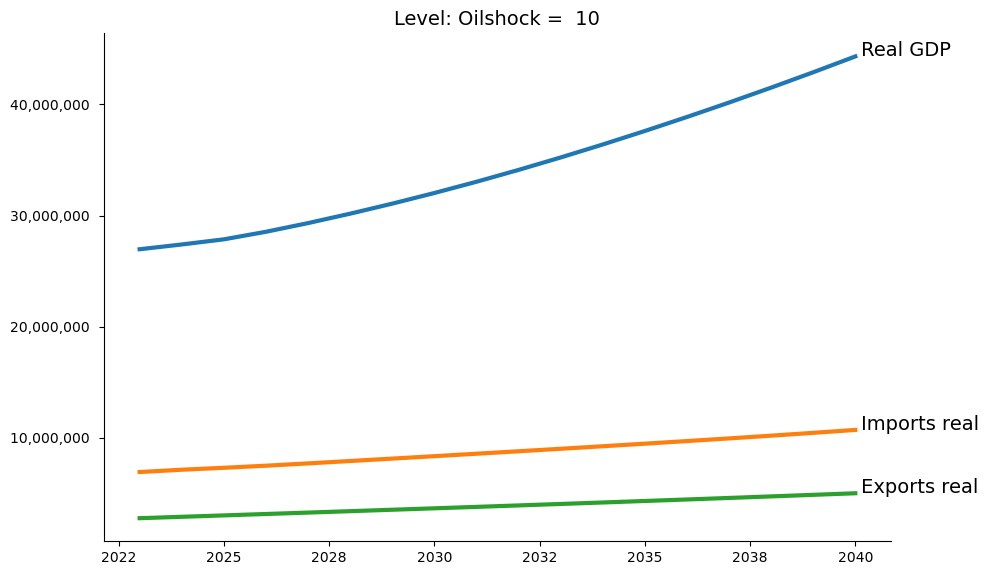

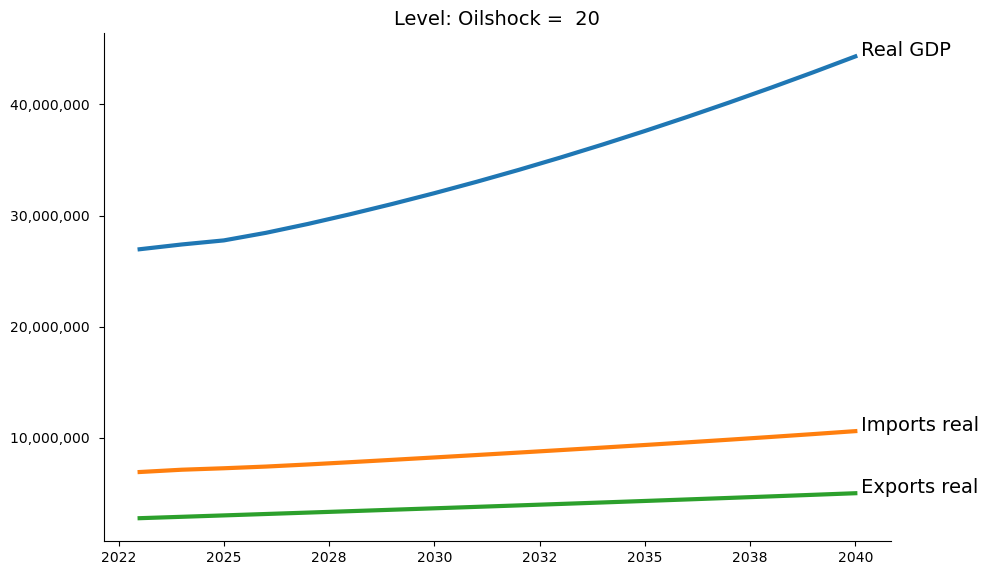

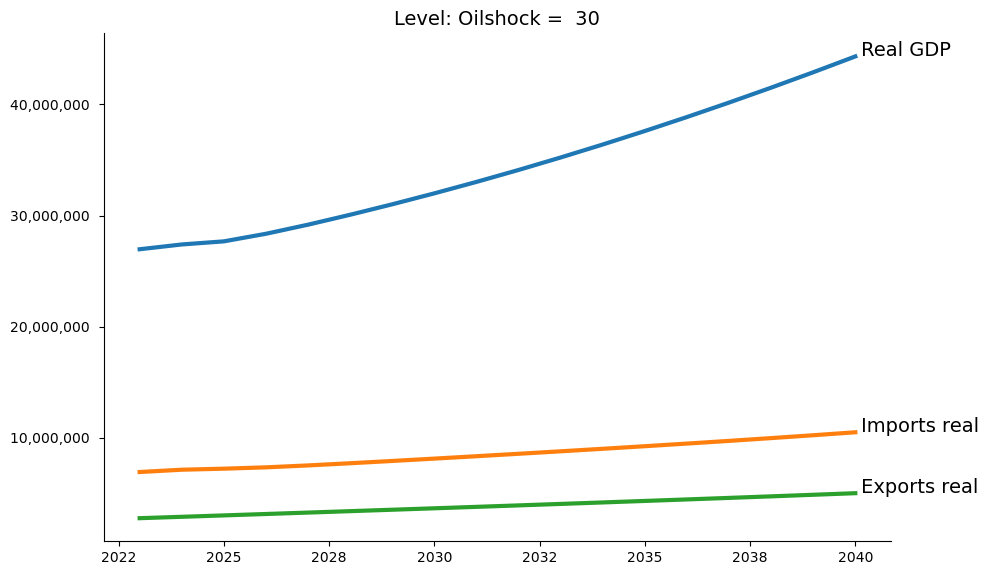

In [41]:
mpak.keep_plot(pat=lookat ,legend=0,keep_dim = False)

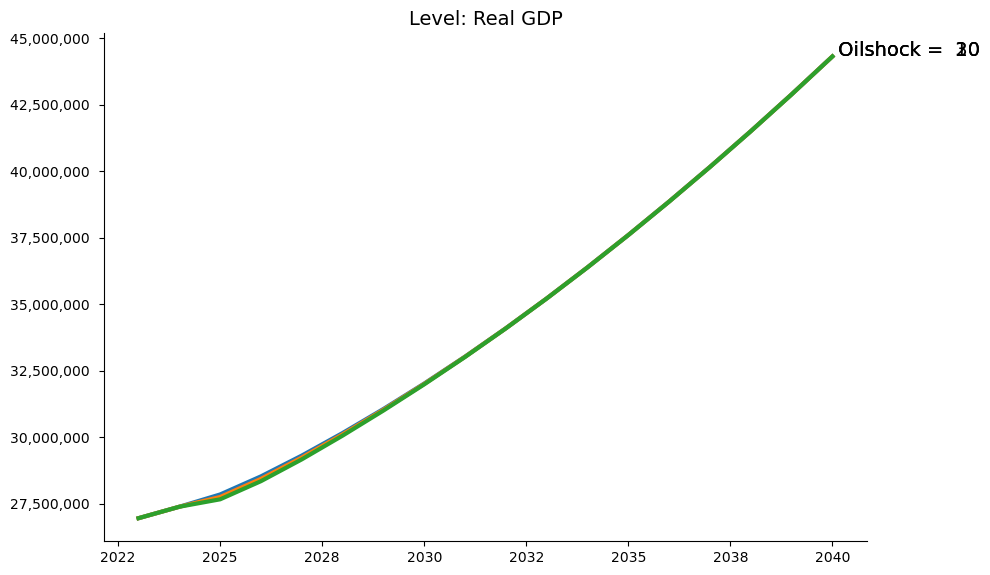

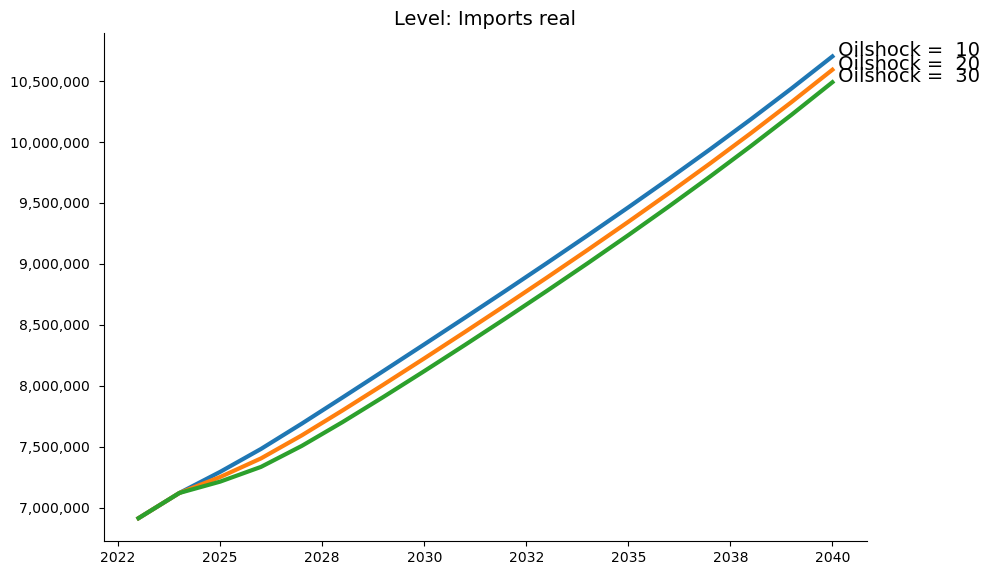

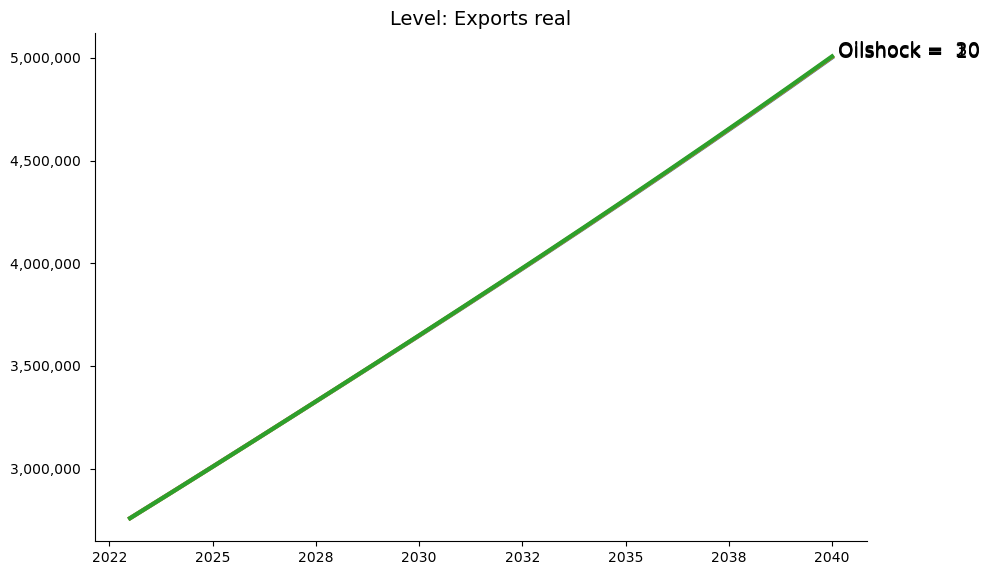

{'PAKNYGDPMKTPKN': <Figure size 1000x600 with 1 Axes>,
 'PAKNEIMPGNFSKN': <Figure size 1000x600 with 1 Axes>,
 'PAKNEEXPGNFSKN': <Figure size 1000x600 with 1 Axes>}

In [51]:
mpak.keep_plot(pat=lookat ,legend=0,keep_dim = True)

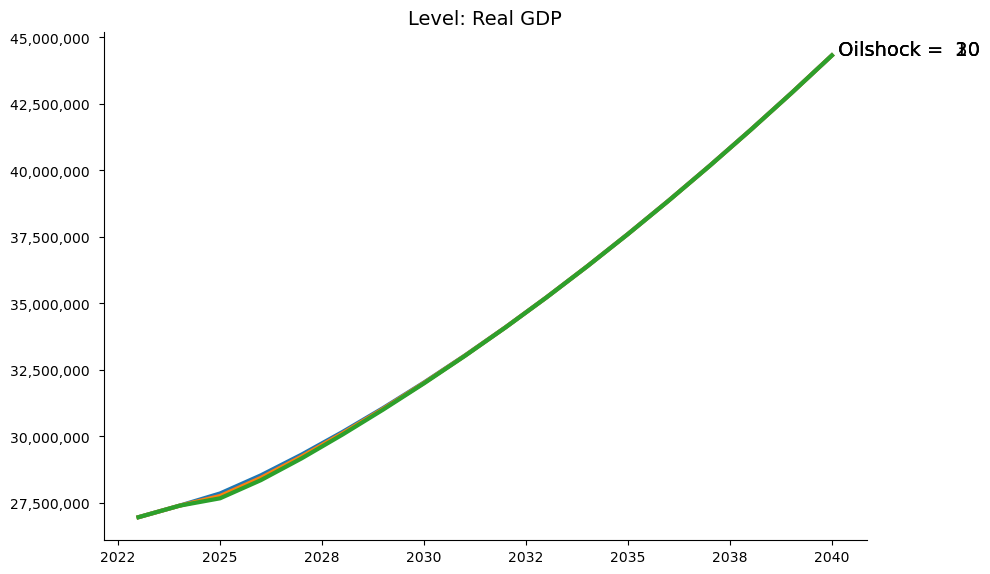

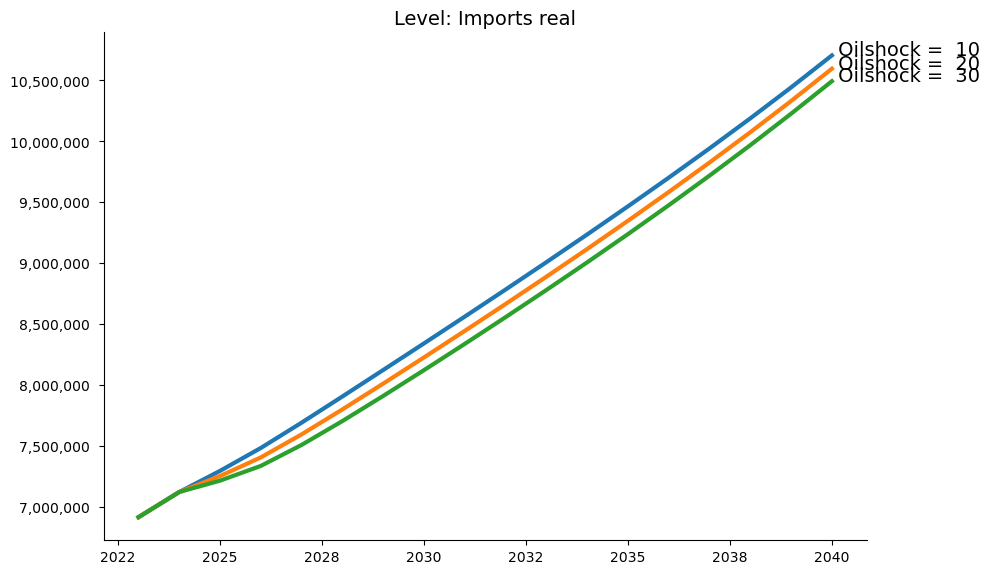

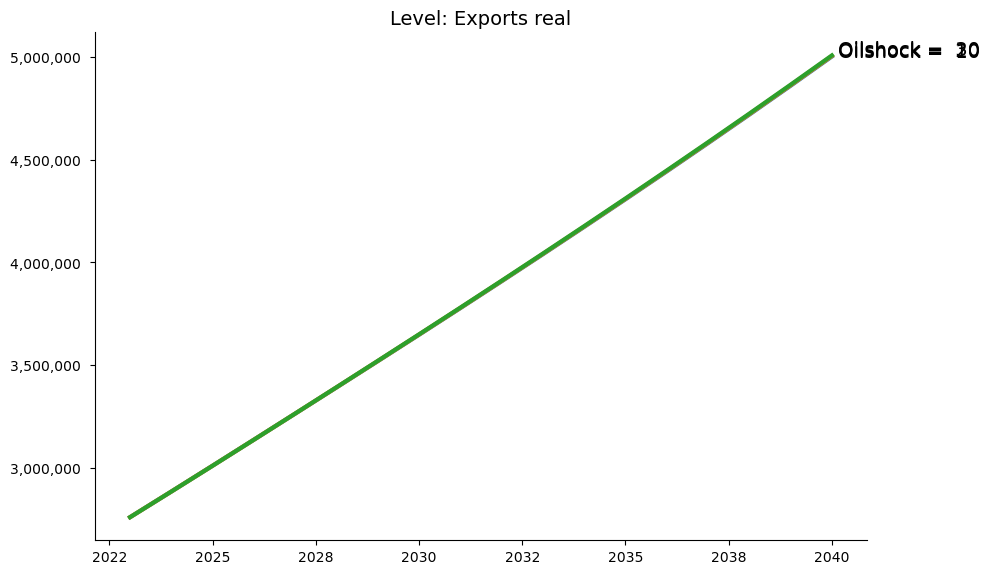

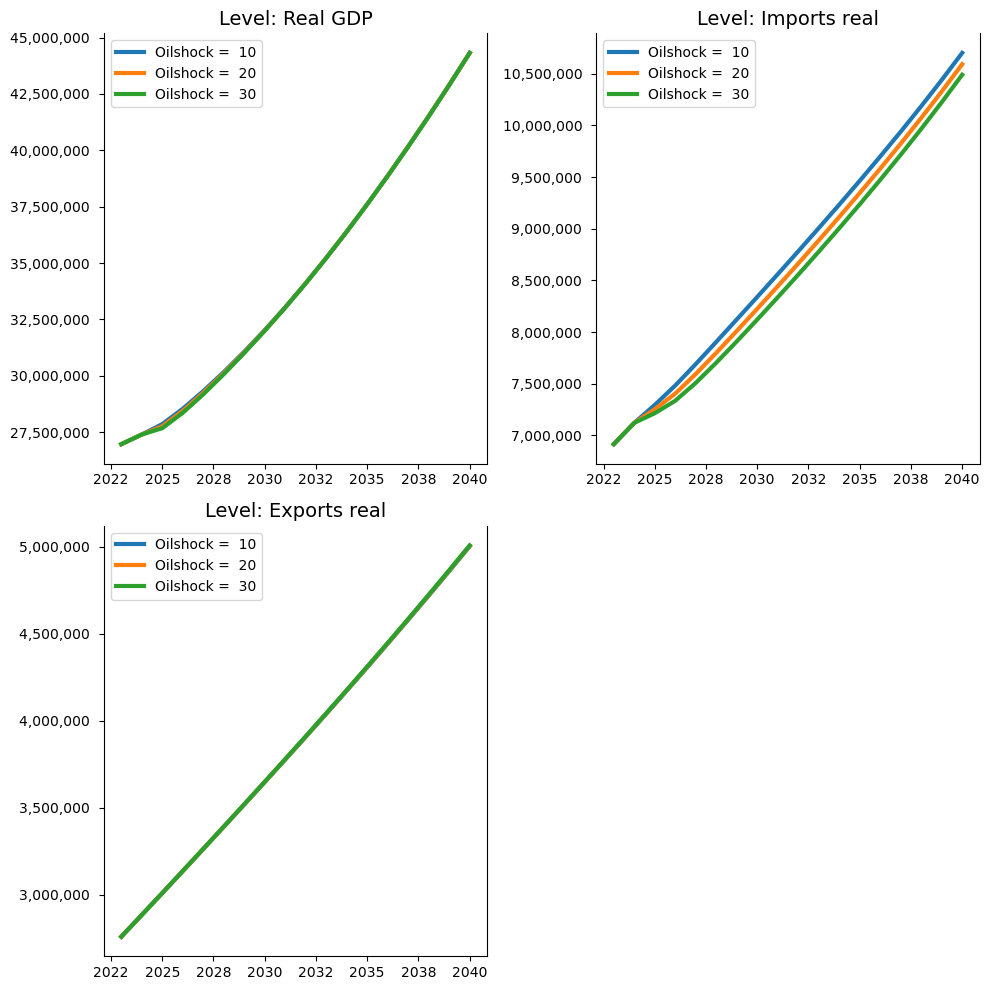

In [52]:
x =mpak.keep_plot_multi(lookat,legend=1,keep_dim=True)

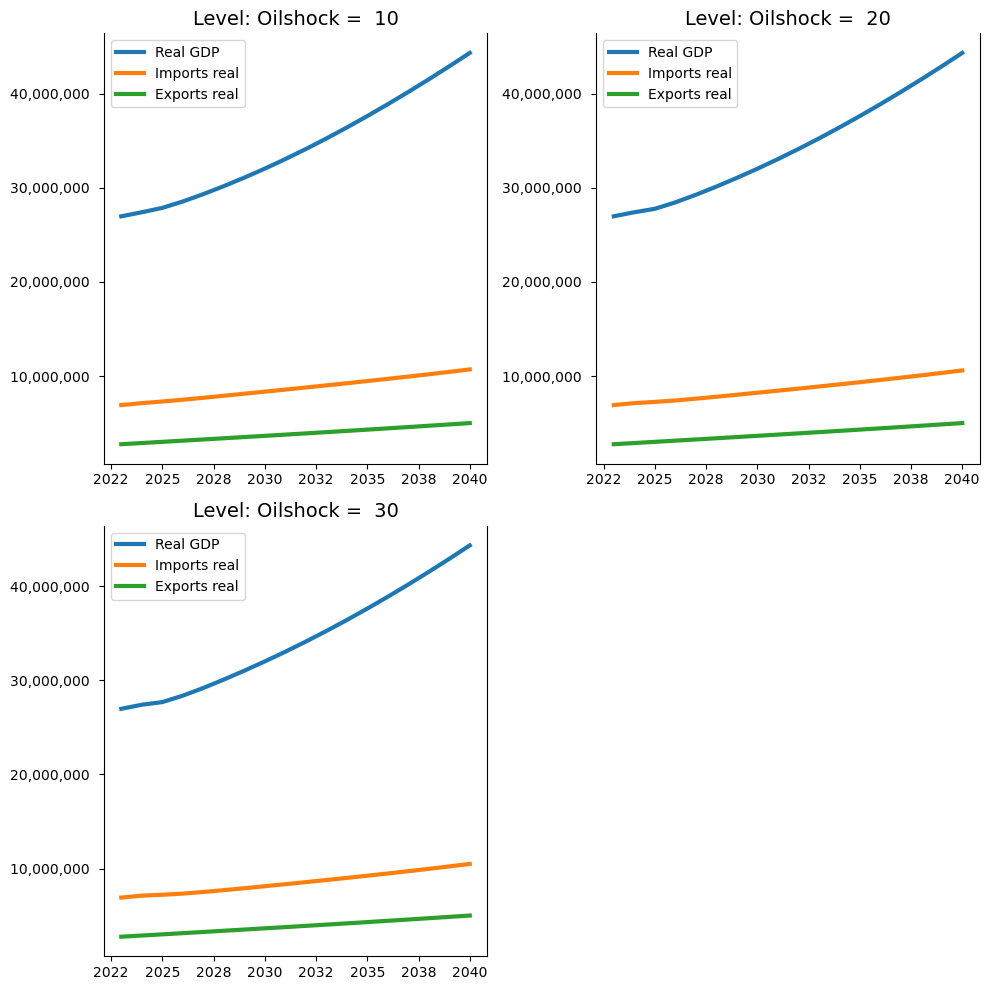

In [50]:
x

### Example 

In [ ]:
mpak.keep_description = {}

_ = mpak(baseline,2020,2100,keep='Baseline') 

scenario_20  =  baseline.upd("<2020 2100> PAKGGREVCO2CER PAKGGREVCO2GER PAKGGREVCO2OER = 20")
_ = mpak(scenario_20,2020,2100,keep='Coal, Oil and Gastax : 20') # runs the simulation

scenario_40  =  baseline.upd("<2020 2100> PAKGGREVCO2CER PAKGGREVCO2GER PAKGGREVCO2OER = 40")
_ = mpak(scenario_40,2020,2100,keep='Coal, Oil and Gastax : 40') # runs the simulation

### More on manipulating keep_solution:
[Here](../howto/experiments/create_experiment.ipynb)

####  .keepswitch(), select scenarios for plotting
When creating many scenarios with the ```keep``` keyword it can sometime be useful to: 
- Plot selected scenarios and to change the sequence of the scenarios. 
- To use the .basedf and .lastdf as scenarios. 

To facilitate this the .keepswitch function has been created.

| Parameter |Explanation
| :- | :---|
|switch = True\|False(default) |If True use the .basedf and .lastdf 
|scenario='\<string>'|Listing of scenarios separated by `\|` if no wildcards else space  
    
.keepswitch is a [context manager](https://www.pythontutorial.net/advanced-python/python-context-managers) like .set_smpl.
So it works in the scope of a ```with```. After the with statement the keept solutions are restored.

```
with mpak.keepswitch(scenarios = '\<selection>'):
   mpak.keep_plot('\<variable selection>',,)
```

#### .keep_plot(), plot the scenarios
This is a very agile function which can produce visualization of the keep't solutions


#### Parameters

| Parameter       | Type            | Description                                                                                      |
|-----------------|-----------------|--------------------------------------------------------------------------------------------------|
| `pat`           | string          | Pattern for variable selection. Defaults to '*'.                                                  |
| `start`         | TYPE            | Start period for the plot. Defaults to ''.                                                        |
| `end`           | TYPE            | End period for the plot. Defaults to ''.                                                          |
| `start_ofset`   | int             | Relative offset for the start period from the current period. Defaults to 0.                      |
| `end_ofset`     | int             | Relative offset for the end period from the current period. Defaults to 0.                        |
| `showtype`      | str             | Type of data transformation ('level', 'growth', or 'change'). Defaults to 'level'.                |
| `diff`          | bool            | If True, shows the difference to the first experiment. Defaults to False.                         |
| `diffpct`       | bool            | If True, shows the difference in percent to the first experiment. Defaults to False.              |
| `mul`           | float           | Multiplier for the data. Defaults to 1.0.                                                         |
| `title`         | str            | Title for the plot. Defaults to 'Show variables'.                                                 |
| `legend`        | bool            | If False, explanations are displayed to the right of the curve. Defaults to True.                 |
| `scale`         | str            | Scale of the plot ('log' or 'linear'). Defaults to 'linear'.                                      |
| `yunit`         | str            | Units for the y-axis. Defaults to ''.                                                             |
| `ylabel`        | str            | Label for the y-axis. Defaults to ''.                                                             |
| `dec`           | TYPE            | Number of decimals to display, automated if ''. Defaults to ''.                                   |
| `trans`         | dict            | Translation dictionary for variable names. Defaults to {}.                                        |
| `showfig`       | bool            | If False, the figure is not displayed. Defaults to True.                                          |
| `vline`         | list of tuples  | List of (time, text) for vertical lines on the plot. To erase, delete `model.vline`.              |
| `savefig`       | string          | Folder to save figures in, creates the folder if needed.                                          |
| `keep_dim`      | bool            | If True, each line represents a scenario; if False, each line represents a variable. Defaults to True. |
| `dataonly`      | bool            | If True, only the resulting data frames are returned, no plot is shown. Defaults to False.        |

 Returns

- `figs`: dict - Dictionary of the generated Matplotlib figures.

 Example Usage

```python
# Customize the plot for specific variables, periods, and additional settings
model.keep_plot(pat='GDP*', start='2020Q1', end='2030Q4', scale='log', savefig='plots/')


(time-frame)=
## .current_per, The time frame
Most operations on a model class instance operates on the current time frame. 
It is a subset of the row index of the dataframe which is simulated. 


In this case it is: 

In [ ]:
mpak.current_per

The possible times in the dataframe is contained in the ```<dataframe>.index``` property. 

In [ ]:
baseline.index  # the index of the dataframe

### .smpl, Set time frame 
The time frame can be set like this:

In [ ]:
mpak.smpl(2020,2025)
mpak.current_per

### .set_smpl, Set timeframe for a local scope
For many operations it can be useful to apply the operations for a shorter time frame, but retain the global time frame after the operation. <br>
This can be done  with a ```with``` statement like this. 

In [ ]:
print(f'Global time  before   {mpak.current_per}')
with mpak.set_smpl(2022,2023):
    print(f'Local time frame      {mpak.current_per}')
print(f'Unchanged global time {mpak.current_per}')

### .set_smpl_relative Set relative timeframe for a local scope
When creating a script it can be useful to set the time frame relative to the 
current time. 

Like this:

In [ ]:
print(f'Global time  before   {mpak.current_per}')
with mpak.set_smpl_relative (-1,0):
    print(f'Local time frame      {mpak.current_per}')
print(f'Unchanged global time {mpak.current_per}')

(index-operator)=

:::{index} single: .[]; Select variables 
:::


## Using the index operator [ ] to select and visualize variables. 

Using the index operator on the model instance like this: 
>mpak[\<variable selection>]

will return a special class (called ```.vis```). It implements a number 
of methods and properties which comes in handy for quick variable:
 - vizualization
 - analysis
 - information     

First the user has to select the relevant variables then several properties and methods can be chained



(variable-selection)=
### Variable selection
In several contexts it is possible to select a number of variables. Variables can be selected on different basis: 
 1. Variable name with wildcards 
 2. Variable descriptions with wildcarts 
 3. Variable groups
 4. all endogenous variables

#### '\<variable name with wildcards>'...  , select matching variables

To select variables the method accept patterns which defines variable names. Wildcards: 
- ```*``` matches everything
- ```?``` matches any single character
- ```\[seq]``` matches any character in seq
- ```\[!seq]``` matches any character not in seq



For more how wildcards can be used, the specification can be found [here](https://docs.python.org/3/library/fnmatch.html)


#### '\<#Variable group>' , select variables matching in variable group 

#### .var_groups, a dictionary of variable groups 
The property `.var_groups` can contain a dictionary of variables defined by variable names with wildcards. 

In [ ]:
mpak.var_groups


#### Example

In [ ]:
mpak['#Balance of payments exports'].des


#### '\<!search pattern>' , select variables where search pattern with  wildcards is matching description  

#### .var_descriptions, a dictionary of variable descriptions 
The property `.var_description` contains a dictionary with variable names as key and a description as value. 

#### Example

In [ ]:
mpak['!*import*'].des

#### '#ENDO' , select all edogenous variables  

In [ ]:
with mpak.set_smpl(2020,2100):
    mpak['PAKNYGDPMKTPKN'].difpctlevel.mul100.rename().plot(colrow=1,
                title='Difference to baseline in percent');

### Access values in .lastdf and .basedf

To limit the output printed, we set the time frame to 2020 to 2023. 

In [ ]:
mpak.smpl(2020,2023);

:::{index} single: .[]; Display information widget 
:::


To access the values of 'PAKNYGDPMKTPKN' and 'PAKNECONPRVTKN' from the latest simulation a small widget is displayed. 

In [ ]:
mpak['PAKNYGDPMKTPKN PAKNECONPRVTKN'] 

:::{index} single: .[]; .base Access basedf 
:::

To access the values of 'PAKNYGDPMKTPKN' and 'PAKNECONPRVTKN' from the base dataframe, specify .base

In [ ]:
mpak['PAKNYGDPMKTPKN PAKNECONPRVTKN'].base.df 

:::{index} single: .[]; .df Return a dataframe 
:::


### .df  Pandas dataframe 

Sometime you need to perform additional operations on the values. Therefor the .df will return a dataframe with the selected variables. 


In [ ]:
mpak['PAKNYGDPMKTPKN PAKNECONPRVTKN'].df


### .show  as a html table with tooltips 

If you want the variable descriptions use this 


In [ ]:
mpak['PAKNYGDPMKTPKN PAKNECONPRVTKN'].show

:::{index} single: .[]; .names Variable names
:::

### .names Variable names

If you select variables using wildcards, then you can access the names that correspond to your query.



In [ ]:
mpak['PAKNYGDP??????'].names

:::{index} single: .[]; .frml Show equations 
:::



### .frml The formulas 

Use .frml to access all the equations for the endogenous variables.  

In [ ]:

mpak['PAKNYGDPMKTPKN PAKNECONPRVTKN'].frml

:::{index} single: .[]; .eviews Show eviews equations - it avaiable
:::

### .eviews The formulas 

Use .eviews to access all the equations for the endogenous variables.  

In [ ]:
mpak['PAKNYGDPMKTPKN PAKNECONPRVTKN'].eviews

:::{index} single: .[]; .rename() Rename variables to description 
:::



### .rename() Rename variables to descriptions

Use .rename() to assign variable descriptions as variable names. 

Handy when plotting! 

In [ ]:
mpak['PAKNYGDPMKTPKN PAKNECONPRVTKN'].rename().df

:::{index} single: .[]; Transformations 
:::

:::{index} single: .[]; .pct  Growth rates
:::

:::{index} single: .[]; .dif |Difference in level
:::

:::{index} single: .[]; .difpct| Difference in growth rate
:::

:::{index} single: .[]; .difpctlevel |difference in level as a pct of baseline
:::

:::{index} single: .[]; .mul100 | multiply by 100
:::

:::{index} single: .[]; .dif |Difference in level
:::


### Transformations of solution results 

When the variables has been selected through the index operator a number of standard data transformations can be performed. 

|Transfomation|Meaning|expression 
| :--- | :--- | :----------------------------------------------:|
| pct | Growth rates | $\frac{this_t}{this_{t-1}} -1$ |
| dif |Difference in level| $l-b$ |                                           |
| difpct| Difference in growth rate | $\big[\frac{l_t}{l_{t-1}} - 1 \big] - \big[\frac{b_t}{b_{t-1}} - 1 \big] $ |
| difpctlevel |difference in level as a pct of baseline | $\frac{l_t-b_t}{b_t} $ |
| mul100 | multiply by 100 | ${this_t \times 100}$ |

- $this$ is the chained value. Default lastdf but if preceeded by .base the values from .basedf will be used 
- $b$ is the values from .basedf
- $l$ is the values from .lastdf 


### .dif Difference in level 

The 'dif' command displays the difference in levels of the latest and previous solutions.

$l-b$

where l is the variable from the .lastdf and b is the variable from .basedf.  

In [ ]:
mpak['PAKNYGDPMKTPKN PAKNECONPRVTKN'].dif.plot()

### .pct  Growthrates 
Display growth rates

$\left(\cfrac{l_t}{l_{t-1}}-1\right )$

In [ ]:
mpak['PAKNYGDPMKTPKN PAKNECONPRVTKN'].pct.plot();

### .difpct property difference in growthrate 
The difference in the growth rates  between the last and base dataframe.  

$\left( \cfrac{l_t}{l_{t-1}}-1 \right) - \left(\cfrac{b_t}{b_{t-1}}-1 \right)$

In [ ]:
mpak['PAKNYGDPMKTPKN PAKNECONPRVTKN'].difpct.plot() ; 

### .difpctlevel percent difference of  levels 

$\left( \cfrac{l_t-b_t}{b_{t}} \right) $

In [ ]:
mpak['PAKNYGDPMKTPKN PAKNECONPRVTKN'].difpctlevel.plot();  

### mul100 multiply by 100 

multiply growth rate by 100. 

In [ ]:
mpak['PAKNYGDPMKTPKN PAKNECONPRVTKN'].pct.mul100.plot() ;


## .plot chart the selected and transformed variables
After the variables has been selected and transformed, they can  be plotted. The .plot() method plots the selected variables separately

In [ ]:
mpak.smpl(2020,2100);

mpak['PAKNYGDP??????'].rename().plot();

### Options to plot() 

Common:<br>
- title (optional): title. Defaults to ''.
- colrow (TYPE, optional): Columns per row . Defaults to 2.
- sharey (TYPE, optional): Share y axis between plots. Defaults to False.
        
        
More excotic:<br>         
- splitchar (TYPE, optional): If the name should be split . Defaults to '__'.
- savefig (TYPE, optional): Save figure. Defaults to ''.
- xsize  (TYPE, optional): x size default to 10 
- ysize  (TYPE, optional): y size per row, defaults to 2
- ppos (optional): # of position to use if split. Defaults to -1.
- kind (TYPE, optional): Matplotlib kind . Defaults to 'line'.


In [ ]:
mpak['PAKNYGDP??????'].difpct.mul100.rename().plot(title='GDP growth ');

## Plotting inspiration


The following graph shows the components of GDP using the values of the baseline dataframe. 

In [ ]:
mpak['PAKNYGDPMKTPKN PAKNECONPRVTKN PAKNEGDIFTOTKN'].\
difpctlevel.mul100.rename().\
plot(title='Components of GDP in pct of baseline',colrow=1,kind='bar') ;

###  Heatmaps

For some model types heatmaps can be helpful, and they come out of the box. This feature was developed for use by bank stress test models. 

In [ ]:
with mpak.set_smpl(2020,2030):
    mpak['PAKNYGDPMKTPKN PAKNECONPRVTKN'].pct.rename().mul100.heat(title='Growth rates',annot=True,dec=1,size=(10,3))  


<a id=’With’></a>
### Violin and boxplots, 
Not obvious for macro models, but useful for stress test  models with many banks. 

In [ ]:
with mpak.set_smpl(2020,2030): 
    mpak['PAKNYGDPMKTPKN PAKNECONPRVTKN'].difpct.box()  
    mpak['PAKNYGDPMKTPKN PAKNECONPRVTKN'].difpct.violin()  


### Plot baseline vs alternative
A raw routine, only showing levels.
To make it really useful it should be expanded. 

In [ ]:
mpak['PAKNYGDPMKTPKN PAKNECONPRVTKN'].plot_alt() ;


## .draw() Graphical presentation of relationships between variables

.draw() helps you understand the relationship between variables in your model better. 
 
The thickness the arrow reflect the attribution of the the upstream variable to the impact on the downstream variable. 

### .draw(up = level, down = level)


You can specify how many levels up and down you want in your graphical presentation (Needs more explanation).

In this example all variables that depend directly upon GDP and consumption as well as those that are determined by them, are displayed. This means one step upstream in the model logic and one step downstream. 

More on the how to visualize the logic structure [here](../06_ModelAnalytics/ModelStructure.ipynb) 

In [ ]:
mpak['PAKNYGDPMKTPKN PAKNECONPRVTKN'].draw(up=1,down=1,png=latex)  # diagram of all direct dependencies 

### .draw(filter =\<minimal impact>)

By specifying filter=  only links where the minimal impact is more than \<minimal impact> are show. In this case 20% 


In [ ]:
mpak['PAKNECONPRVTKN'].draw(up=3,down=1,filter=20,png=latex)  



## dekomp() Attribution of right hand side variables to
change in result. 
For more information on attribution look [here](../06_ModelAnalytics/AttributionSomeFeatures.ipynb)

The dekomp command decomposes the contributions of the right hand side variables to the observed change in the left hand side variables. 

In [ ]:
with mpak.set_smpl(2021,2025):
    mpak['PAKNYGDPMKTPKN PAKNECONPRVTKN'].dekomp()  # frml attribution 

## Bespoken plots using matplotlib  (or plotly -later) (should go to a separate plot book 

The predefined plots are not necessary created for presentation purpose. To create  bespoken plots the they can be 
constructed directly in python scripts. The two main libraries are matplotlib, plotly but any ther python plotting library can be used. Here is an example using matplotlib. 

## Plot four separate plots of multiple series in grid   

In [ ]:
figure,axs= plt.subplots(2,2,figsize=(11, 7))
axs[0,0].plot(mpak.basedf.loc[2020:2099,'PAKGGBALOVRLCN_'],label='Baseline')
axs[0,0].plot(mpak.lastdf.loc[2020:2099,'PAKGGBALOVRLCN_'],label='Scenario')
#axs[0,0].legend()

axs[0,1].plot(mpak.basedf.loc[2020:2099,'PAKGGDBTTOTLCN_'],label='Baseline')
axs[0,1].plot(mpak.lastdf.loc[2020:2099,'PAKGGDBTTOTLCN_'],label='Scenario')

axs[1,0].plot(mpak.basedf.loc[2020:2099,'PAKGGREVTOTLCN']/mpak.basedf.loc[2020:2099,'PAKNYGDPMKTPCN']*100,label='Baseline')
axs[1,0].plot(mpak.lastdf.loc[2020:2099,'PAKGGREVTOTLCN']/mpak.lastdf.loc[2020:2099,'PAKNYGDPMKTPCN']*100,label='Scenario')

axs[1,1].plot(mpak.basedf.loc[2020:2099,'PAKGGREVGRNTCN']/mpak.basedf.loc[2020:2099,'PAKNYGDPMKTPCN']*100,label='Baseline')
axs[1,1].plot(mpak.lastdf.loc[2020:2099,'PAKGGREVGRNTCN']/mpak.lastdf.loc[2020:2099,'PAKNYGDPMKTPCN']*100,label='Scenario')
#axs2[4].plot(mpak.lastdf.loc[2000:2099,'PAKGGREVGRNTCN']/mpak.basedf.loc[2000:2099,'PAKNYGDPMKTPCN']*100,label='Scenario')

axs[0,0].title.set_text("Fiscal balance (% of GDP)")
axs[0,1].title.set_text("Gov't Debt (% of GDP)")
axs[1,0].title.set_text("Total revenues (% of GDP)")
axs[1,1].title.set_text("Grant Revenues (% of GDP)")
figure.suptitle("Fiscal outcomes")

plt.figlegend(['Baseline','Scenario'],loc='lower left',ncol=5)  
figure.tight_layout(pad=2.3) #Ensures legend does not overlap dates
figure